The equation 
$$ \omega^2\tilde{v}(z) + 2i\omega\tilde{v}'(z) + (1-v_0^2)\tilde{v}''(z) = 0, \tilde{v}(-1) = \tilde{v}(1) = 0 $$
can be reduced to normal form
$$ u''(z) + r(z)u(z) = 0, u(-1) = u(1) = 0 $$
by doing the following variable change
$$
u(z) = \exp\left(\frac{iv_0\omega}{1-v_0^2}\right)\tilde{v}(z); \;\;\;
r(z) = \frac{\omega^2}{(1-v_0^2)^2}
$$
For the details, please read this blog,
[Eliminates first order term](https://www.johndcook.com/blog/2017/10/20/eliminate-first-order-term/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_settting
from functions import Spectral, polyeig

In [27]:
N = 101
spectral = Spectral(N,"symmetric", "FD")
x = spectral.x
D2 = spectral.D2

v0 = 1.5
A2 = np.eye(N)
A1 = np.zeros_like(A2)
A0 = (1-v0**2)**2*D2

[ 1.92491941  3.84938232  5.77293233  7.69511327  9.61546927 11.53354493
 13.44888536 15.36103633 17.26954437 19.17395686]
[ 1.96349541  3.92699082  5.89048623  7.85398163  9.81747704 11.78097245
 13.74446786 15.70796327 17.67145868]


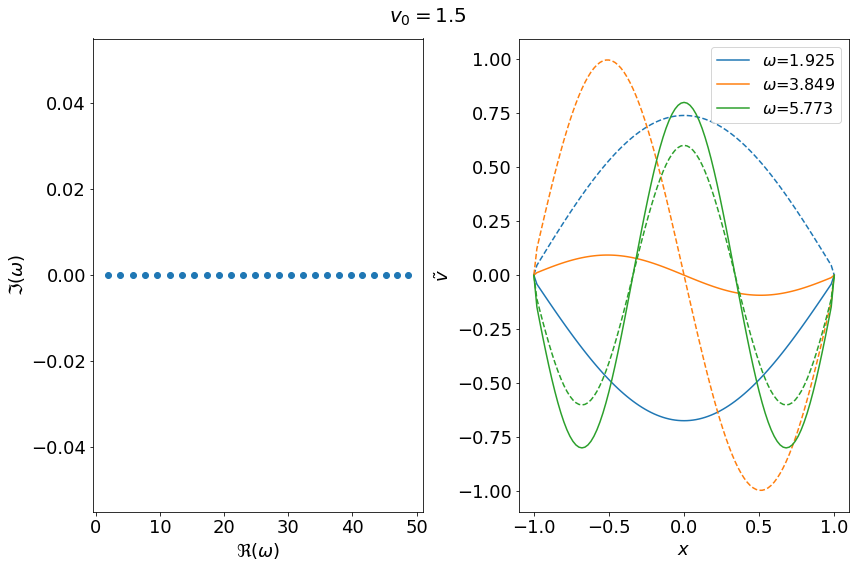

In [28]:
U, omega = polyeig(A0,A1,A2)
U[[0,-1],:] = 0 # Dirichlet boundary condition
# transform back to variable \tilde{v}
V = np.zeros_like(U,dtype=complex)
for i in range(omega.size):
    V[:,i] = U[:,i]*np.exp(-1j*v0*omega[i]/(1-v0**2))

selection = (np.real(omega)>=0) & (np.real(omega) < 50)
V = V[:,selection]
omega = omega[selection]

# sort
ind = np.argsort(np.real(omega))
omega = omega[ind]
V = V[:,ind]

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.plot(np.real(omega), np.imag(omega), 'o')
plt.xlabel("$\Re(\omega)$")
plt.ylabel("$\Im(\omega)$")

plt.subplot(122)
for i in range(3):
    v = V[:,i]
    line = plt.plot(x, np.real(v), label=f"$\omega$={omega[i]:.3f}")
    plt.plot(x, np.imag(v), '--', color=line[0]._color)

plt.xlabel("$x$")
plt.ylabel("$\\tilde{v}$")
plt.legend()
plt.suptitle(f"$v_0={v0}$")
plt.tight_layout()

print(omega[:10])
print(np.abs(1-v0**2)*np.pi/2*np.arange(1,10))

In [29]:
import sympy as sp

In [42]:
z = sp.var("z")
omega = sp.var("omega",constant=True)
v0 = sp.Function("v0")(z)
v0_p = v0.diff(z)
v0_pp = v0.diff(z,2)

p = (2*1j*omega*v0 - 3*v0*v0_p + v0_p/v0)/(1-v0**2)
q = (omega**2-v0**2+1-v0*v0_pp-v0_pp/v0)/(1-v0**2)
(q**2 - p.diff(z)/2 - p**2/4).simplify()

(-((2.0*I*omega - 3*Derivative(v0(z), z))*v0(z)**2 + Derivative(v0(z), z))**2/4 - ((2.0*I*omega - 3*Derivative(v0(z), z))*v0(z)**2 + Derivative(v0(z), z))*v0(z)**2*Derivative(v0(z), z) + ((-omega**2 + v0(z)**2 + v0(z)*Derivative(v0(z), (z, 2)) - 1)*v0(z) + Derivative(v0(z), (z, 2)))**2 + (v0(z)**2 - 1)*((4.0*I*omega*Derivative(v0(z), z) - 6*v0(z)*Derivative(v0(z), (z, 2)) - 6*Derivative(v0(z), z)**2)*v0(z)**2 + 2*v0(z)*Derivative(v0(z), (z, 2)) - 2*Derivative(v0(z), z)**2)/4)/((v0(z)**2 - 1)**2*v0(z)**2)